In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


## EDA:

In [148]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission.csv')

In [499]:
test.shape

(233599, 11)

In [227]:
test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [228]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [229]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [230]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

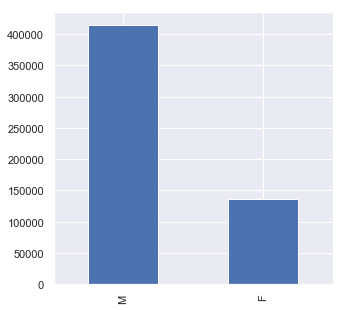

In [231]:
train.Gender.value_counts().plot(kind = 'bar')

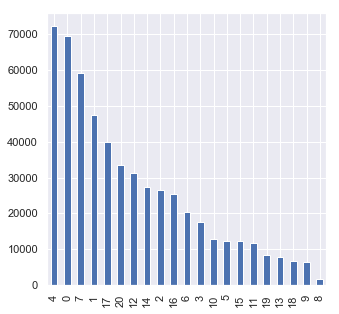

In [232]:
train.Occupation.value_counts().plot(kind = 'bar')

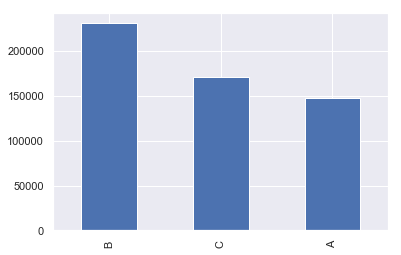

In [11]:
train.City_Category.value_counts().plot(kind = 'bar')

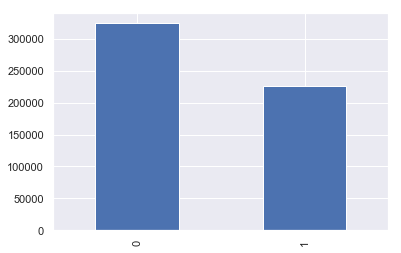

In [12]:
train.Marital_Status.value_counts().plot(kind = 'bar')

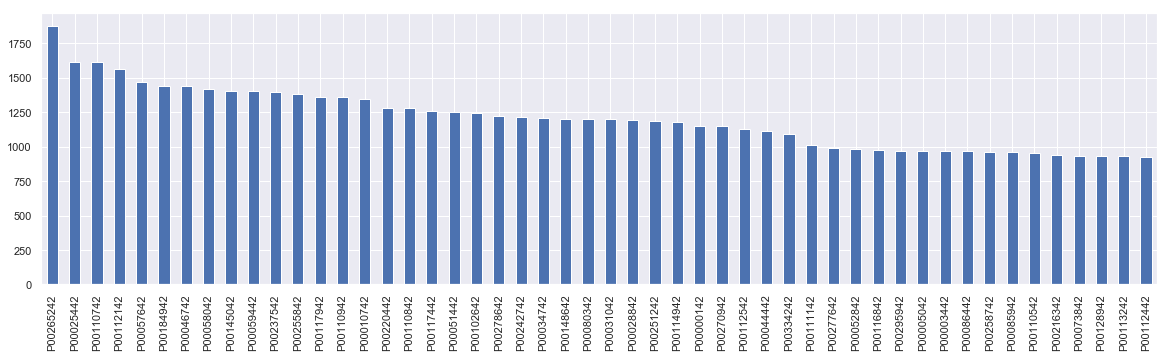

In [30]:
ax,f = plt.subplots(1,1,figsize = (20,5))
train.Product_ID.value_counts()[:50].plot(kind = 'bar')

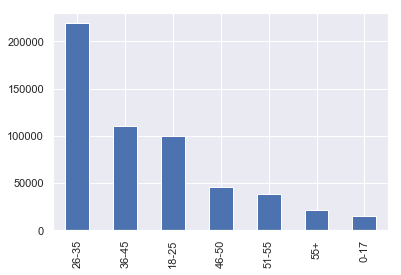

In [29]:
train.Age.value_counts().plot(kind = 'bar')

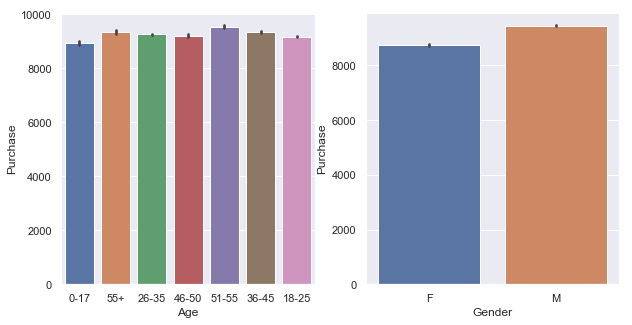

In [36]:
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.barplot(x = 'Age', y = 'Purchase', data = train, ax = ax[0])
sns.barplot(x = 'Gender', y = 'Purchase', data = train, ax = ax[1])

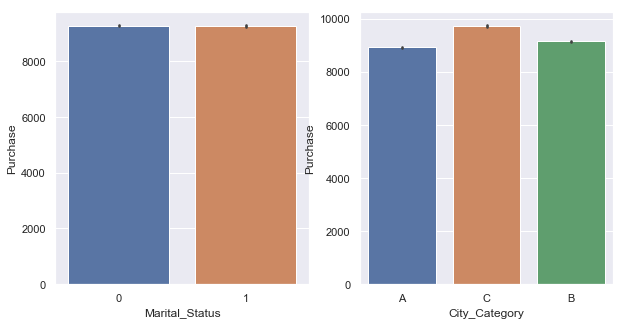

In [37]:
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = train, ax = ax[0])
sns.barplot(x = 'City_Category', y = 'Purchase', data = train, ax = ax[1])

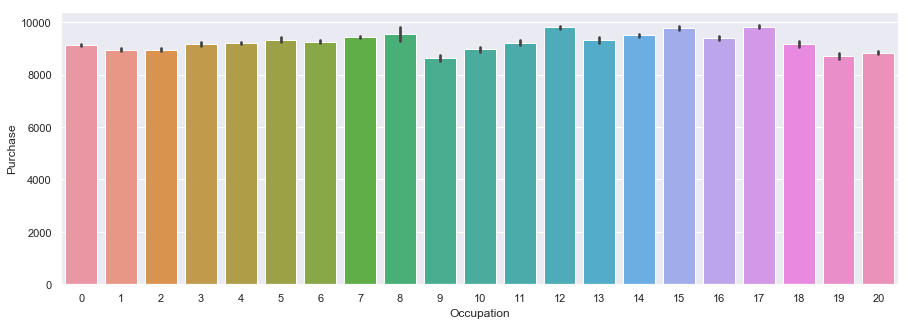

In [38]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'Occupation', y = 'Purchase', data = train)

In [40]:
train.groupby('Stay_In_Current_City_Years')['Purchase'].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

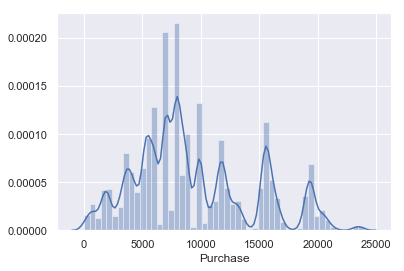

In [41]:
sns.distplot(train.Purchase)

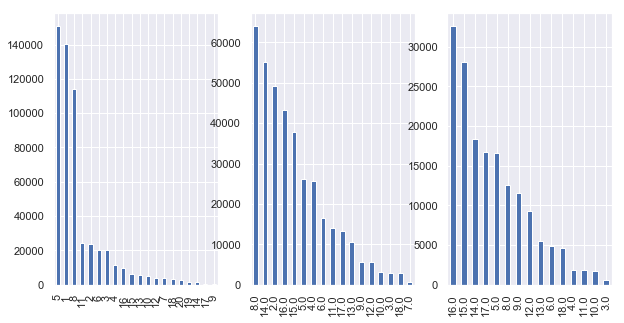

In [44]:
f,ax = plt.subplots(1,3,figsize = (10,5))
train.Product_Category_1.value_counts().plot(kind = 'bar', ax = ax[0])
train.Product_Category_2.value_counts().plot(kind = 'bar', ax = ax[1])
train.Product_Category_3.value_counts().plot(kind = 'bar', ax = ax[2])

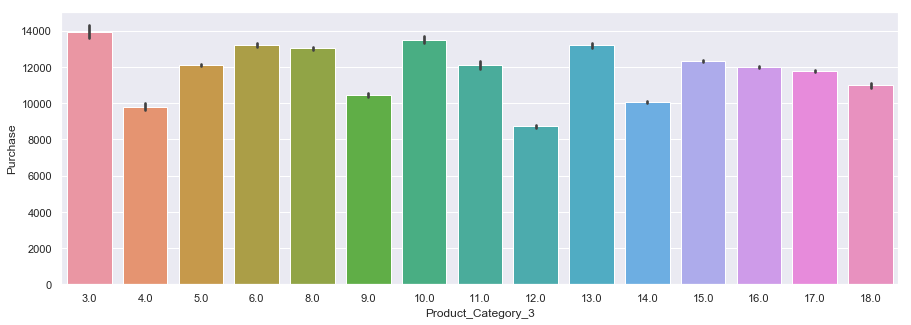

In [45]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'Product_Category_3', y = 'Purchase', data = train)

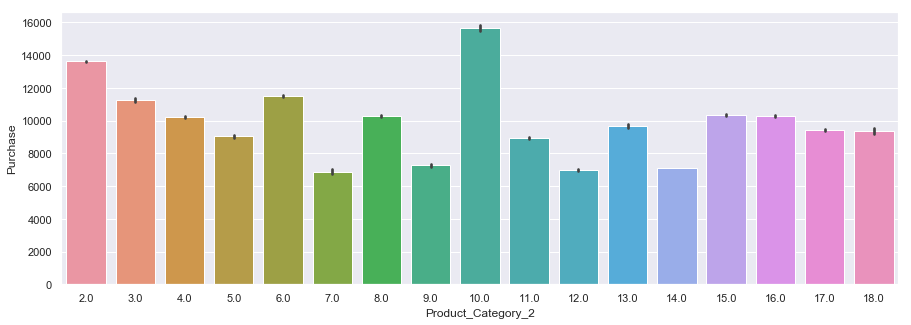

In [46]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'Product_Category_2', y = 'Purchase', data = train)

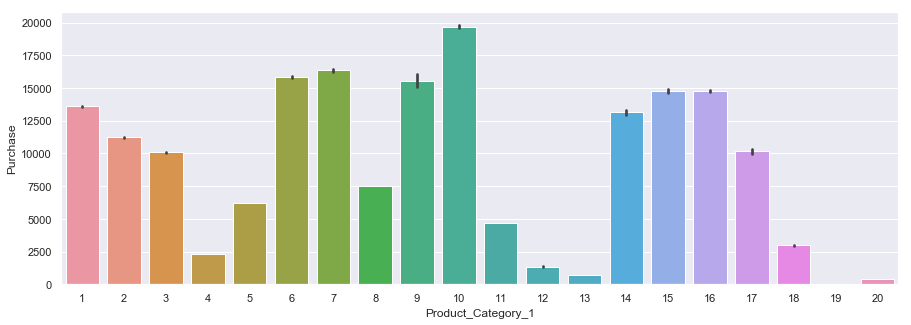

In [47]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = train)

In [396]:
train['Product_ID_count'] = np.nan
X = pd.qcut(train.groupby('Product_ID').Purchase.sum(), [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], labels = False)
train['Product_ID_count'] = train.Product_ID.map(X)

In [397]:
train['User_ID_count'] = np.nan
X = pd.qcut(train.groupby('User_ID').Purchase.sum(), [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], labels = False)
train['User_ID_count'] = train.User_ID.map(X)

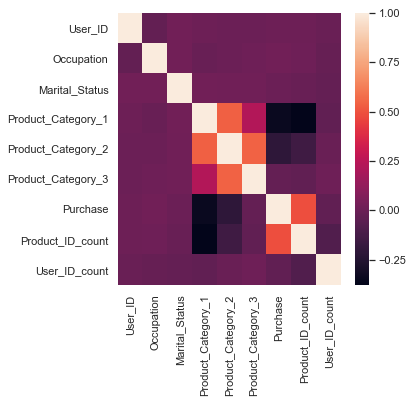

In [280]:
sns.heatmap(train.corr())

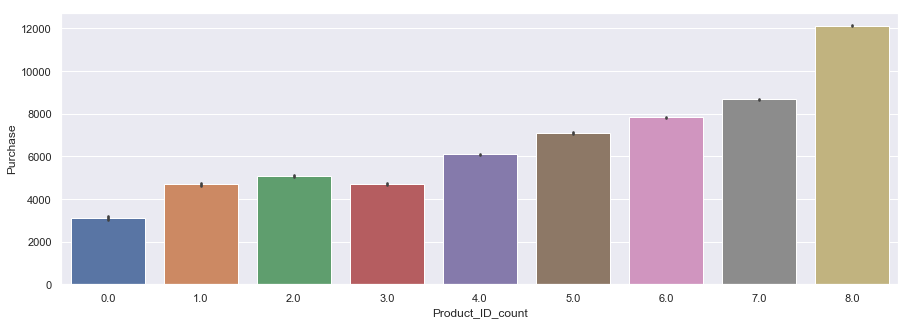

In [236]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'Product_ID_count', y = 'Purchase', data = train)

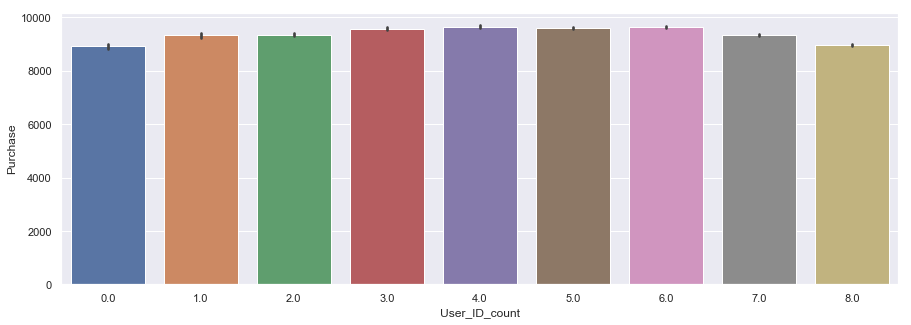

In [94]:
f,ax = plt.subplots(1,1,figsize = (15,5))
sns.barplot(x = 'User_ID_count', y = 'Purchase', data = train)

## Preprocessing:

In [149]:

train['Product_ID_per'] = np.nan
X = pd.qcut(train.groupby('Product_ID').Purchase.sum(), [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], labels = False)
train['Product_ID_per'] = train.Product_ID.map(X)
train['User_ID_per'] = np.nan
Y = pd.qcut(train.groupby('User_ID').Purchase.sum(), [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], labels = False)
train['User_ID_per'] = train.User_ID.map(Y)

test['Product_ID_per'] = np.nan
test['Product_ID_per'] = test.Product_ID.map(X)
test['User_ID_per'] = np.nan
test['User_ID_per'] = test.User_ID.map(Y)

In [150]:
H = train.groupby('Occupation').Age.count()
train['occ_count'] = train.Occupation.map(H)
L = test.groupby('Occupation').Age.count()
test['occ_count'] = test.Occupation.map(L)

H = train.groupby('Age').Occupation.count()
train['Age_count'] = train.Age.map(H)
L = test.groupby('Age').Occupation.count()
test['Age_count'] = test.Age.map(H)

In [151]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 15 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
Product_ID_per                233004 non-null float64
User_ID_per                   229579 non-null float64
occ_count                     233599 non-null int64
Age_count                     233599 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 26.7+ MB


In [1]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Gender','Age','Occupation','City_Category','Marital_Status','Stay_In_Current_City_Years']
train[cols] = train[cols].apply(le.fit_transform)


NameError: name 'pd' is not defined

In [153]:
cols = ['Gender','Age','Occupation','City_Category','Marital_Status','Stay_In_Current_City_Years']
test[cols] = test[cols].apply(le.fit_transform)

In [154]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0])
train['Product_Category_3'] = train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0])

test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0])
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0])



In [155]:
train = train.fillna(999)

In [156]:

test = test.fillna(999)

In [157]:
train = train.drop(['User_ID','Product_ID'],1)
test = test.drop(['User_ID','Product_ID'],1)

In [158]:
from sklearn.cross_validation import train_test_split


In [159]:
y = train.Purchase
X = train.drop('Purchase',1)
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20, random_state=42)
D_matrix = xgb.DMatrix(data=X,label=y)

## Models:


In [160]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import KFold

### XGBOOST:


In [611]:
params = {}
params["min_child_weight"] = 10
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["silent"] = 1
params["max_depth"] = 6
params["n_thread"] = -1
#params["gamma"] = 1
params["objective"] = "reg:linear"
params["eta"] = 0.1
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0
plst = list(params.items())
num_rounds = 30

parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500],
            'base_score':[1800]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                       scoring = 'neg_mean_squared_error')


In [612]:
#model_1_xgboost.fit(Xtrain,ytrain)
xgb_grid.fit(Xtrain,ytrain)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [500], 'subsample': [0.7], 'colsample_bytree': [0.7], 'silent': [1], 'objective': ['reg:linear'], 'learning_rate': [0.1], 'base_score': [1800], 'max_depth': [6], 'min_child_weight': [10]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=True)

In [613]:
xgb_new = xgb_grid.best_estimator_

In [614]:
xgb_new.fit(Xtrain,ytrain)

XGBRegressor(base_score=1800, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=10, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.7)

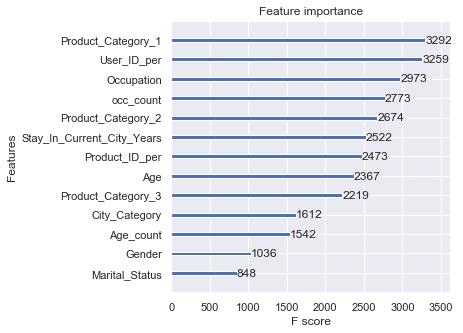

In [615]:
xgb.plot_importance(xgb_new)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [161]:
preds = xgb_new.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

NameError: name 'xgb_new' is not defined

In [617]:
pred_df = pd.DataFrame()
pred_df['Purchase'] = preds
test = pd.read_csv('test.csv')
sample_submission = pd.concat([test[['User_ID','Product_ID']], pred_df],1)

In [618]:
sample_submission.to_csv('Submission6.csv',header = True, index = 0)

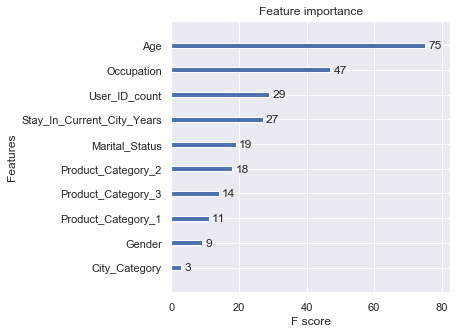

In [37]:
xgb1 = xgb.XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [0.05, .1], #so called `eta` value
              'max_depth': [6, 7,8],
              'min_child_weight': [2,4],
              'silent': [1],
              'subsample': [0.9],
              'colsample_bytree': [0.9],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                       scoring = 'neg_mean_squared_error')

In [620]:
xgb_grid.fit(Xtrain,ytrain)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 20.8min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [500], 'subsample': [0.9], 'colsample_bytree': [0.9], 'silent': [1], 'objective': ['reg:linear'], 'learning_rate': [0.05, 0.1], 'max_depth': [6, 7, 8], 'min_child_weight': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=True)

In [552]:
xgb_grid.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 4,
 'n_estimators': 500,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.9}

In [553]:

xgb_grid.best_score_

-7342540.944704203

In [162]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.05,
                max_depth = 8,n_estimators= 500, subsample = .9, min_child_weight = 4, n_jobs = -1 )

xg_reg1.fit(Xtrain,ytrain)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=4, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

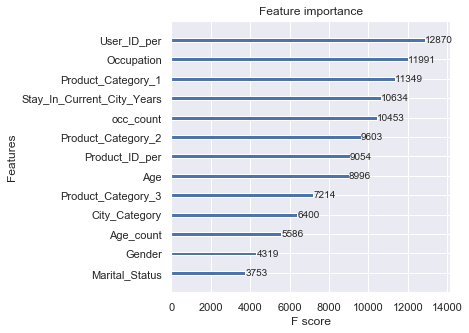

In [163]:
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [164]:
preds = xg_reg1.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 2707.994434


In [165]:
preds = pd.DataFrame()
preds['Purchase'] = xg_reg1.predict(test)

In [166]:
test = pd.read_csv('test.csv')
sample_submission = pd.concat([test[['User_ID','Product_ID']], preds],1)

In [167]:
sample_submission.to_csv('Submission_best.csv',header = True, index = 0)

### Extra Trees:

In [34]:
model_5 = ExtraTreesRegressor(n_estimators= 1500, 
                              max_depth= 30,
                              min_samples_split=10, 
                              min_samples_leaf=10, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              verbose=1, 
                              bootstrap=True)
model_5.fit(Xtrain,ytrain)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 11.9min finished


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=30,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=10,
          min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
          oob_score=True, random_state=42, verbose=1, warm_start=False)

In [35]:
pred5 = model_5.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred5))
print("RMSE: %f" % (rmse))

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    8.4s


RMSE: 2762.376579


[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:   10.2s finished


In [36]:
model_5.feature_importances_

array([0.00393577, 0.00609948, 0.0102652 , 0.00694659, 0.01151535,
       0.00571946, 0.77299461, 0.06285209, 0.03213345, 0.06429691,
       0.00708335, 0.00965007, 0.00650767])

### Stacking:



In [98]:
frames = [train, test]
input = pd.concat(frames)
target = input.Purchase
input.drop(["Purchase"], axis=1, inplace=True)
first_stage_rows = np.random.randint(train.shape[0], size = np.int(train.shape[0]/2))


/Users/arjunbenney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [99]:
train_np   = input.head(train.shape[0])
target_np  = target[:train.shape[0]]
train_fs   = train_np.iloc[first_stage_rows]
target_fs  = target_np.iloc[first_stage_rows]
train_ss   = train_np[~train_np.index.isin(first_stage_rows)]
target_ss  = target_np[~target_np.index.isin(first_stage_rows)]

In [ ]:
model_xgb = xg_reg1.fit(train_fs,target_fs)
model_extra = model_5.fit(train_fs,target_fs)



In [101]:
model_xgb_pred = model_xgb.predict(train_2_df)
model_extra_pred = model_extra.predict(train_2_df)
train_ss_w_meta = np.concatenate((train_ss, np.vstack((model_xgb_pred, model_extra_pred)).T), axis=1)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   21.5s
[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:   26.0s finished


In [104]:
kfolds = KFold(train_2_pred.shape[0], n_folds=5)

In [115]:
params = {}
params["min_child_weight"] = 4
params["subsample"] = .9
params["colsample_bytree"] = .9
params["silent"] = 1
params["max_depth"] = 8
params["n_jobs"] = -1
#params["gamma"] = 1
params["objective"] = "reg:linear"
params["eta"] = 0.05
params["base_score"] = 1800
params["eval_metric"] = "rmse"
params["seed"] = 0

plst = list(params.items())
num_rounds = 500


In [116]:
for train_index, validation_index in kfolds:
    
    train_X, validation_X = train_np.iloc[train_index], train_np.iloc[validation_index]
    train_y, validation_y = target_np.iloc[train_index], target_np.iloc[validation_index]
    
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    watchlist = [(xgtrain, 'train')]
    model_cv_xgboost = xgb.train(plst, xgtrain, num_rounds)
    model_cv_predict = model_cv_xgboost.predict(xgb.DMatrix(validation_X))
    print np.sqrt(mean_squared_error(validation_y, model_cv_predict))

2704.970993576853
2740.510803326161
2700.1899504496314
2707.53617990793
2711.304618133446


In [117]:
xgtrain = xgb.DMatrix(train_ss_w_meta, label=target_ss)
watchlist = [(xgtrain, 'train')]
model_ss_xgboost = xgb.train(plst, xgtrain, num_rounds)

In [137]:
test_df   = input.tail(test.shape[0])
model_xgb_pred = xg_reg1.predict(test_df)
model_extra_pred = model_5.predict(test_df)




[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   10.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   15.7s
[Parallel(n_jobs=8)]: Done 1500 out of 1500 | elapsed:   18.6s finished


In [138]:
test_stack = np.concatenate((test_df, np.vstack((model_xgb_pred, model_extra_pred)).T), axis=1)

In [140]:
model_ss_predict = model_ss_xgboost.predict(xgb.DMatrix(test_stack))

In [141]:
np.max(model_ss_predict), np.min(model_ss_predict)

(23297.291, 309.01587)

In [143]:
sub.Purchase = model_ss_predict

In [146]:
sub.to_csv('submission_stack_1.csv')